# Group By in Python
- Can be applied to categorial data
- Group data into category
- single or multiple variables

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("automobileEDA.xls")

In [5]:
df_test = df[['drive-wheels', 'body-style', 'price']]


In [6]:
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index= False).mean()

In [7]:
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [8]:
df_group_one= df[['drive-wheels', 'body-style', 'price']]


In [9]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [12]:
#GROUPING RESULTS
df_grptest = df[['drive-wheels', 'body-style', 'price']]
group_test1 = df_grptest.groupby(['drive-wheels', 'body-style'], as_index= False).mean()
group_pivot = group_test1.pivot(index  ='drive-wheels', columns = 'body-style')
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [14]:
group_test2 = df_grptest.groupby(['drive-wheels', 'body-style'], as_index= True).mean()
group_pivot2  = group_test1.pivot(index  ='drive-wheels', columns = 'body-style')
group_pivot2

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [16]:
#GROUPING RESULTS
df_grptest = df[['drive-wheels', 'body-style', 'price']]
group_test1 = df_grptest.groupby(['drive-wheels', 'body-style'], as_index= False).mean()
group_pivot = group_test1.pivot(index  ='drive-wheels', columns = 'body-style')
group_pivot = group_pivot.fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

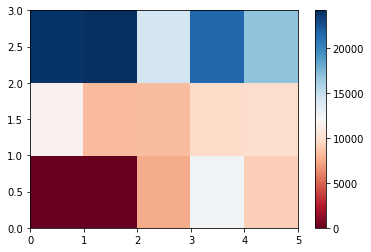

In [18]:
plt.pcolor(group_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

TypeError: 'builtin_function_or_method' object is not subscriptable

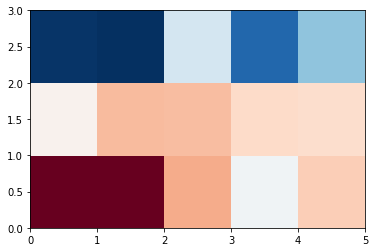

In [32]:
import numpy as np
fig,ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap = 'RdBu')
#Label
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index
ax.set_xticks(np.arange[group_pivot.shape[1]+0.5])
ax.set_yticks(np.arange[group_pivot.shape[0]+0.5])
ax.xticklabels(row_labels, minor= False)
ax.yticklabels(col_labels, minor= False)
plt.xticks(rotation =90)
fig.colorbar(im)
plt.show()

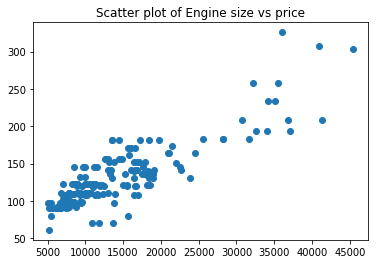

In [23]:
y = df['engine-size']
x = df['price']
plt.scatter(x,y)
plt.title('Scatter plot of Engine size vs price')
plt.show()

In [28]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
pearson_coef


0.8095745670036559

In [27]:
p_value

6.36905742825998e-48

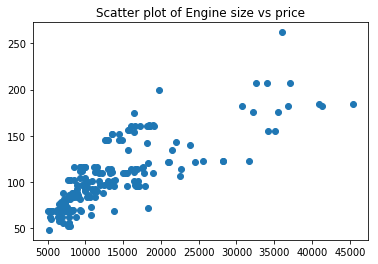

In [30]:
y = df['horsepower']
x = df['price']
plt.scatter(x,y)
plt.title('Scatter plot of Engine size vs price')
plt.show()

# ANOVA -[ Analysis of Variance]
- used for finding corelation between different groups of categorical variables
- output is -  F- score variation between group method divided by variation within sample group means
 fscore = variation between group / variation within group 
 
 - p - value : Confidence degree
 - small f imply poor corelation between variable categories & target variable
 - large F imply strong corelation between variable categories & target variable
 -  F score is always between 0-1 , if it is greater than 1 then variance within group is large than between groups.

In [33]:
df_anova = df[['make', 'price']]

In [35]:
grouped_anova = df_anova.groupby(df_anova['make'])

In [39]:
amova_results_1 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
amova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [40]:
amova_results_1 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'])
amova_results_1

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

# Exercise :  Plot Box and Bar plot for honda, suburu and jaguar

# MODEL DEVELOPMENT
Learning Objectives : 
 - Simple and multiple linear regression
 - Model Evaluation using virtualization
 - Polynomial regression
 - R - squared & MSE for in sample evaluation
 - Prediction and decesion making
Model Development : 
  - A model can be thought of as mathematical equaation used to predict a value given one or more other values
  - Relating one or more independent variable to dependent variable
  

In [ ]:
import pandas as pd